# Make Moon 처음부터 다시

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pickle
with open('raw_data_20181008.pickle', 'rb') as handle:
    raw_data = pickle.load(handle)

In [4]:
raw_data.keys()

dict_keys(['AK홀딩스', 'BGF', 'BGF리테일', 'BNK금융지주', 'CJ', 'CJ CGV', 'CJ대한통운', 'CJ제일제당', 'DB손해보험', 'DB하이텍', 'GKL', 'GS', 'GS건설', 'GS리테일', 'HDC', 'HDC현대산업개발', 'JW중외제약', 'JW홀딩스', 'KB금융', 'KCC', 'KT', 'KT&G', 'LF', 'LG', 'LG디스플레이', 'LG상사', 'LG생활건강', 'LG유플러스', 'LG이노텍', 'LG전자', 'LG하우시스', 'LG화학', 'LIG넥스원', 'LS', 'LS산전', 'NAVER', 'NH투자증권', 'OCI', 'POSCO', 'S&T모티브', 'S-Oil', 'SBS', 'SK', 'SKC', 'SK네트웍스', 'SK디스커버리', 'SK이노베이션', 'SK케미칼', 'SK텔레콤', 'SK하이닉스', 'SPC삼립', '강원랜드', '고려아연', '고려제강', '금호석유', '금호타이어', '기아차', '기업은행', '남양유업', '남해화학', '넥센타이어', '넷마블', '녹십자', '녹십자홀딩스', '농심', '대교', '대덕전자', '대림산업', '대상', '대우건설', '대우조선해양', '대웅제약', '대한유화', '대한항공', '동국제강', '동서', '동아쏘시오홀딩스', '동아에스티', '동양', '동원F&B', '동원시스템즈', '두산', '두산밥캣', '두산인프라코어', '두산중공업', '락앤락', '롯데쇼핑', '롯데정밀화학', '롯데지주', '롯데칠성', '롯데케미칼', '롯데푸드', '롯데하이마트', '만도', '메리츠종금증권', '무학', '미래에셋대우', '보령제약', '부광약품', '빙그레', '삼성SDI', '삼성물산', '삼성바이오로직스', '삼성생명', '삼성에스디에스', '삼성엔지니어링', '삼성전기', '삼성전자', '삼성중공업', '삼성증권', '삼성카드', '삼성화재', '삼양사', '삼양홀딩스', '세방전지', '세아베스틸', '세아제강'

In [12]:
df.loc[:"2013-07-01"].isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
raw_data[stock].loc[:"2013-07-01"].isnull().sum().sum()

0

In [24]:
copy_keys = list(raw_data.keys())
for stock in copy_keys:
    if len(raw_data[stock].loc[:'2013-01-01']) < 1:
        del raw_data[stock]
        print(stock)

BGF
BGF리테일
HDC현대산업개발
LIG넥스원
SK케미칼
넷마블
동아에스티
두산밥캣
만도
삼성물산
삼성바이오로직스
삼성에스디에스
오리온
이노션
종근당
코스맥스
쿠쿠홀딩스
현대로템
현대중공업지주
효성중공업


In [25]:
len(raw_data)

182

In [26]:
raw_data['삼성전자'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,16060.0,16180.0,16000.0,16180.0,5.953252,11950800
2010-01-05,16520.0,16580.0,16300.0,16440.0,6.048919,27925850
2010-01-06,16580.0,16820.0,16520.0,16820.0,6.188735,22948850
2010-01-07,16820.0,16820.0,16260.0,16260.0,5.982689,22107950
2010-01-08,16400.0,16420.0,16120.0,16420.0,6.041558,14777550


In [27]:
# stock에서 Volume==0인 index, stock에서 제외
for key, df in raw_data.items():
    raw_data[key] = df.drop(df.index[np.where(df.Volume==0)[0]], axis=0)

In [28]:
# feature 생성
for key, df in raw_data.items():
    df["pct_change"] = df.Close.pct_change()
    for i in range(3, 31, 2):
        df["close_ma_{}".format(i)] = df.Close.rolling(window = i).mean()
        df["volume_ma_{}".format(i)] = df.Volume.rolling(window = i).mean()
    for i in [7, 21, 30, 60, 90, 91, 100, 120]:
        df["his_vol_{}".format(i)] = df["pct_change"].rolling(window = i).std()*(252**0.5)
    for i in [1, 3, 5, 7, 10, 12, 14]:
        df['returnsCC{}'.format(i) ]= np.log(df.Open / df.Close.shift(i))
        df['returnsOO{}'.format(i) ] = np.log(df.Open / df.Open.shift(i))
        df['returnsCC{}'.format(i) ]= np.log(df.Close / df.Close.shift(i))
        df['returnsOC{}'.format(i) ] = np.log(df.Close / df.Open.shift(i))
    for i in [1, 3, 5, 7, 10]:
        df['Y3_{}'.format(i)] = np.where(df.Close.rolling(i).mean() - df.Close.shift(1).rolling(i).mean()>=0,1,0)
        for shift in [1, 2, 3, 4, 5]:
            df['sh{}_Y3_{}'.format(shift, i)] = df['Y3_{}'.format(i)].shift(-1*shift)

In [30]:
data={}
validation_={}
for stock, df in raw_data.items():
    data[stock] = df.loc['2013-07-01':'2018-07-01']
    validation_[stock] = df.loc['2018-06-20':]

In [31]:
validation_['삼성전자'].head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_5,...,sh2_Y3_7,sh3_Y3_7,sh4_Y3_7,sh5_Y3_7,Y3_10,sh1_Y3_10,sh2_Y3_10,sh3_Y3_10,sh4_Y3_10,sh5_Y3_10
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-20,47450.0,47600.0,46850.0,47000.0,46653.011719,12959316,0.000000,46866.666667,1.494639e+07,47290.0,...,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0
2018-06-21,47900.0,47900.0,47050.0,47050.0,46702.644531,10015541,0.001064,47016.666667,1.273094e+07,47060.0,...,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2018-06-22,47000.0,47250.0,46200.0,47250.0,46901.167969,10298006,0.004251,47100.000000,1.109095e+07,46980.0,...,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2018-06-25,47050.0,47050.0,46150.0,46650.0,46305.597656,10587711,-0.012698,46983.333333,1.030042e+07,46990.0,...,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2018-06-26,45900.0,47300.0,45900.0,47000.0,46653.011719,11223166,0.007503,46966.666667,1.070296e+07,46990.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [35]:
X = [i for i in data['삼성전자'].columns if i.find('sh') == -1]

In [37]:
%run moon_code

In [38]:
train, test = multi_train_test_split(data, 0.8, dtrain=True)

In [40]:
test['삼성전자']

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_5,...,sh2_Y3_7,sh3_Y3_7,sh4_Y3_7,sh5_Y3_7,Y3_10,sh1_Y3_10,sh2_Y3_10,sh3_Y3_10,sh4_Y3_10,sh5_Y3_10
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-20,47240.0,48140.0,47220.0,48140.0,12429.440430,15045000,0.033935,46760.000000,1.458412e+07,46264.0,...,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0
2017-06-21,47740.0,48120.0,47480.0,47480.0,12259.031250,9973650,-0.013710,47393.333333,1.210752e+07,46688.0,...,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0
2017-06-22,47960.0,48080.0,47720.0,47960.0,12382.965820,11455800,0.010110,47860.000000,1.215815e+07,47144.0,...,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0
2017-06-23,47600.0,47780.0,47420.0,47620.0,12295.179688,9515100,-0.007089,47686.666667,1.031485e+07,47552.0,...,1.0,1.0,0.0,1.0,1,1.0,1.0,1.0,1.0,1.0
2017-06-26,47520.0,48360.0,47520.0,48280.0,12465.586914,8552800,0.013860,47953.333333,9.841233e+06,47896.0,...,1.0,0.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0
2017-06-27,48220.0,48400.0,47900.0,48300.0,12470.751953,9616750,0.000414,48066.666667,9.228217e+06,47928.0,...,0.0,1.0,0.0,0.0,1,1.0,1.0,1.0,1.0,0.0
2017-06-28,47600.0,48000.0,47560.0,47700.0,12315.835938,9572500,-0.012422,48093.333333,9.247350e+06,47972.0,...,1.0,0.0,0.0,0.0,1,1.0,1.0,1.0,0.0,1.0
2017-06-29,48040.0,48320.0,47940.0,47940.0,14506.661133,8306550,0.005031,47980.000000,9.165267e+06,47968.0,...,0.0,0.0,0.0,0.0,1,1.0,1.0,0.0,1.0,1.0
2017-06-30,47500.0,47620.0,47100.0,47540.0,14385.622070,11877550,-0.008344,47726.666667,9.918867e+06,47952.0,...,0.0,0.0,0.0,1.0,1,1.0,0.0,1.0,1.0,1.0


# Learning

In [42]:
alg = XGBClassifier(
 learning_rate =0.15,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [43]:
y_li = [i for i in data['삼성전자'].columns if i.find('sh') != -1]

In [48]:
import copy

def modelfit(alg, train, test, X, y):
    alg = copy.deepcopy(alg)
    xgb_params = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(train[X].values, label=train[y].values)
    cvresult=xgb.cv(xgb_params, xgtrain,
                    num_boost_round=alg.get_params()['n_estimators'],
                    nfold=5, early_stopping_rounds=50,
                    show_stdv=False)
    alg.set_params(n_estimators=cvresult.shape[0])
    alg.fit(train[X], train[y], eval_metric='auc')
    dtrain_predictions = alg.predict(train[X])
    dtrain_predprob = alg.predict_proba(train[X])[:,1]
    dtest_predictions = alg.predict(test[X])
    dtest_predprob = alg.predict_proba(test[X])[:,1]
    print("Train Accuracy : {:.4f}".format(metrics.accuracy_score(
                            train[y].values, dtrain_predictions)))
    print("Train AUC Score : {:.4f}".format(metrics.roc_auc_score(
                            train[y].values, dtrain_predprob)))
    print("Test  Accuracy : {:.4f}".format(metrics.accuracy_score(
                            test[y].values, dtest_predictions)))
    print("Test  AUC Score : {:.4f}".format(metrics.roc_auc_score(
                            test[y].values, dtest_predprob)))
    return alg

In [45]:
print(y_li)

['sh1_Y3_1', 'sh2_Y3_1', 'sh3_Y3_1', 'sh4_Y3_1', 'sh5_Y3_1', 'sh1_Y3_3', 'sh2_Y3_3', 'sh3_Y3_3', 'sh4_Y3_3', 'sh5_Y3_3', 'sh1_Y3_5', 'sh2_Y3_5', 'sh3_Y3_5', 'sh4_Y3_5', 'sh5_Y3_5', 'sh1_Y3_7', 'sh2_Y3_7', 'sh3_Y3_7', 'sh4_Y3_7', 'sh5_Y3_7', 'sh1_Y3_10', 'sh2_Y3_10', 'sh3_Y3_10', 'sh4_Y3_10', 'sh5_Y3_10']


In [47]:
%run xgb_modelfit

In [50]:
import warnings
warnings.filterwarnings(action='ignore')

In [51]:
model_set = {}
for stock, df in train.items():
    print(stock)
    model = modelfit(alg, df, test[stock], X, 'sh1_Y3_5')
    model_set[stock] = model

AK홀딩스
Train Accuracy : 0.9224
Train AUC Score : 0.9821
Test  Accuracy : 0.8571
Test  AUC Score : 0.9298
BNK금융지주
Train Accuracy : 0.9040
Train AUC Score : 0.9750
Test  Accuracy : 0.8531
Test  AUC Score : 0.9247
CJ
Train Accuracy : 0.9193
Train AUC Score : 0.9766
Test  Accuracy : 0.8286
Test  AUC Score : 0.9164
CJ CGV
Train Accuracy : 0.9316
Train AUC Score : 0.9856
Test  Accuracy : 0.8571
Test  AUC Score : 0.9192
CJ대한통운
Train Accuracy : 0.9459
Train AUC Score : 0.9912
Test  Accuracy : 0.8612
Test  AUC Score : 0.9278
CJ제일제당
Train Accuracy : 0.9694
Train AUC Score : 0.9982
Test  Accuracy : 0.8367
Test  AUC Score : 0.9165
DB손해보험
Train Accuracy : 0.9571
Train AUC Score : 0.9927
Test  Accuracy : 0.8163
Test  AUC Score : 0.9028
DB하이텍
Train Accuracy : 0.9234
Train AUC Score : 0.9766
Test  Accuracy : 0.8408
Test  AUC Score : 0.9241
GKL
Train Accuracy : 0.9336
Train AUC Score : 0.9822
Test  Accuracy : 0.8612
Test  AUC Score : 0.9410
GS
Train Accuracy : 0.9734
Train AUC Score : 0.9978
Test  Accur

Train Accuracy : 0.9205
Train AUC Score : 0.9787
Test  Accuracy : 0.8292
Test  AUC Score : 0.8976
롯데칠성
Train Accuracy : 1.0000
Train AUC Score : 1.0000
Test  Accuracy : 0.7810
Test  AUC Score : 0.8602
롯데케미칼
Train Accuracy : 0.9857
Train AUC Score : 0.9989
Test  Accuracy : 0.7837
Test  AUC Score : 0.8541
롯데푸드
Train Accuracy : 0.9275
Train AUC Score : 0.9805
Test  Accuracy : 0.8182
Test  AUC Score : 0.9028
롯데하이마트
Train Accuracy : 0.9734
Train AUC Score : 0.9978
Test  Accuracy : 0.8122
Test  AUC Score : 0.9078
메리츠종금증권
Train Accuracy : 0.9990
Train AUC Score : 1.0000
Test  Accuracy : 0.8286
Test  AUC Score : 0.9055
무학
Train Accuracy : 0.9387
Train AUC Score : 0.9874
Test  Accuracy : 0.7673
Test  AUC Score : 0.8755
미래에셋대우
Train Accuracy : 0.8999
Train AUC Score : 0.9647
Test  Accuracy : 0.8204
Test  AUC Score : 0.8982
보령제약
Train Accuracy : 0.9078
Train AUC Score : 0.9674
Test  Accuracy : 0.8122
Test  AUC Score : 0.8863
부광약품
Train Accuracy : 1.0000
Train AUC Score : 1.0000
Test  Accuracy : 0

Train Accuracy : 0.9775
Train AUC Score : 0.9977
Test  Accuracy : 0.8490
Test  AUC Score : 0.9210
한화생명
Train Accuracy : 0.8866
Train AUC Score : 0.9583
Test  Accuracy : 0.8408
Test  AUC Score : 0.9104
한화에어로스페이스
Train Accuracy : 0.9101
Train AUC Score : 0.9532
Test  Accuracy : 0.8327
Test  AUC Score : 0.8734
한화케미칼
Train Accuracy : 0.9826
Train AUC Score : 0.9988
Test  Accuracy : 0.7510
Test  AUC Score : 0.8432
현대건설
Train Accuracy : 0.9275
Train AUC Score : 0.9746
Test  Accuracy : 0.8367
Test  AUC Score : 0.9039
현대그린푸드
Train Accuracy : 0.9694
Train AUC Score : 0.9976
Test  Accuracy : 0.7959
Test  AUC Score : 0.8993
현대글로비스
Train Accuracy : 0.9939
Train AUC Score : 0.9999
Test  Accuracy : 0.8245
Test  AUC Score : 0.8769
현대리바트
Train Accuracy : 0.9367
Train AUC Score : 0.9861
Test  Accuracy : 0.7755
Test  AUC Score : 0.8934
현대모비스
Train Accuracy : 0.9101
Train AUC Score : 0.9707
Test  Accuracy : 0.8163
Test  AUC Score : 0.8879
현대미포조선
Train Accuracy : 0.9132
Train AUC Score : 0.9770
Test  Accu

In [56]:
for stock, model in model_set.items():
    print(stock, ' ', model.get_params()['n_estimators'])

AK홀딩스   12
BNK금융지주   17
CJ   12
CJ CGV   20
CJ대한통운   26
CJ제일제당   43
DB손해보험   32
DB하이텍   12
GKL   22
GS   41
GS건설   4
GS리테일   15
HDC   22
JW중외제약   2
JW홀딩스   26
KB금융   11
KCC   13
KT   21
KT&G   6
LF   4
LG   47
LG디스플레이   171
LG상사   26
LG생활건강   12
LG유플러스   6
LG이노텍   3
LG전자   4
LG하우시스   22
LG화학   6
LS   12
LS산전   2
NAVER   5
NH투자증권   32
OCI   7
POSCO   15
S&T모티브   12
S-Oil   37
SBS   72
SK   49
SKC   12
SK네트웍스   12
SK디스커버리   25
SK이노베이션   10
SK텔레콤   25
SK하이닉스   16
SPC삼립   16
강원랜드   29
고려아연   14
고려제강   20
금호석유   11
금호타이어   6
기아차   9
기업은행   43
남양유업   19
남해화학   8
넥센타이어   22
녹십자   10
녹십자홀딩스   14
농심   10
대교   39
대덕전자   11
대림산업   3
대상   7
대우건설   15
대우조선해양   10
대웅제약   6
대한유화   20
대한항공   5
동국제강   20
동서   25
동아쏘시오홀딩스   15
동양   52
동원F&B   6
동원시스템즈   74
두산   18
두산인프라코어   13
두산중공업   14
락앤락   6
롯데쇼핑   16
롯데정밀화학   24
롯데지주   12
롯데칠성   88
롯데케미칼   47
롯데푸드   13
롯데하이마트   41
메리츠종금증권   66
무학   21
미래에셋대우   4
보령제약   5
부광약품   178
빙그레   38
삼성SDI   18
삼성생명   12
삼성엔지니어링   12
삼성전기   9
삼성전자   43
삼성중공업   48
삼성증권   30
삼

In [60]:
a = copy.deepcopy(model_set['삼성전자'])
a.predict(validation_['삼성전자'])

array([0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0.])

In [107]:
pred = pd.DataFrame()
for stock, model in model_set.items():
    a = model.predict(validation_[stock][X])
    a = pd.DataFrame(a, index = validation_[stock].index, columns=['{}'.format(stock)])
    pred = pd.concat((pred, a), axis=1)
    pred = pred.fillna(0)
col = pd.MultiIndex.from_product([['pred'],pred.columns])
pred.columns = col

In [109]:
y_true = pd.DataFrame()
for stock in model_set.keys():
    y_true = pd.concat((y_true, validation_[stock]['Y3_5']), axis=1)
y_true.columns = list(model_set.keys())
y_true = y_true.fillna(0)
col = pd.MultiIndex.from_product([['y_true'],y_true.columns])
y_true.columns = col

In [110]:
y_true2 = pd.DataFrame()
for stock in model_set.keys():
    y_true2 = pd.concat((y_true2, validation_[stock]['sh1_Y3_5']), axis=1)
y_true2.columns = list(model_set.keys())
y_true2 = y_true2.fillna(0)
col = pd.MultiIndex.from_product([['y_true2'],y_true2.columns])
y_true2.columns = col

In [87]:
(y_true == pred).sum() / len(y_true)

AK홀딩스        0.857143
BNK금융지주      0.842857
CJ           0.871429
CJ CGV       0.828571
CJ대한통운       0.785714
CJ제일제당       0.814286
DB손해보험       0.900000
DB하이텍        0.814286
GKL          0.871429
GS           0.757143
GS건설         0.814286
GS리테일        0.828571
HDC          0.800000
JW중외제약       0.828571
JW홀딩스        0.857143
KB금융         0.771429
KCC          0.771429
KT           0.828571
KT&G         0.871429
LF           0.885714
LG           0.771429
LG디스플레이      0.857143
LG상사         0.814286
LG생활건강       0.814286
LG유플러스       0.757143
LG이노텍        0.871429
LG전자         0.828571
LG하우시스       0.800000
LG화학         0.771429
LS           0.728571
               ...   
한세실업         0.842857
한솔케미칼        0.900000
한온시스템        0.842857
한올바이오파마      0.800000
한일시멘트        0.942857
한전KPS        0.757143
한전기술         0.771429
한진중공업        0.785714
한화           0.914286
한화생명         0.900000
한화에어로스페이스    0.785714
한화케미칼        0.800000
현대건설         0.814286
현대그린푸드       0.857143
현대글로비스    

In [156]:
def get_col_df(df_name, fillna=None):
    df = pd.DataFrame()
    for stock in model_set.keys():
        df = pd.concat((df,validation_[stock][df_name]), axis=1)
    df.columns = list(model_set.keys())
    if fillna == 'mean':
        df = df.fillna(df.mean())
    else:
        df = df.fillna(0)
    col = pd.MultiIndex.from_product([['{}'.format(df_name)],df.columns])
    df.columns = col
    return df

In [158]:
res = pd.concat((pred, y_true, y_true2), axis=1)
res = pd.concat((res, get_col_df('Close', 'mean')), axis=1)
res = pd.concat((res, get_col_df('Open', 'mean')), axis=1)

In [314]:
res

pred                                                           \
           AK홀딩스 BNK금융지주   CJ CJ CGV CJ대한통운 CJ제일제당 DB손해보험 DB하이텍  GKL   GS   
Date                                                                        
2018-06-20   0.0     0.0  0.0    0.0    0.0    0.0    1.0   1.0  0.0  0.0   
2018-06-21   0.0     0.0  0.0    0.0    1.0    0.0    1.0   0.0  0.0  0.0   
2018-06-22   0.0     0.0  0.0    1.0    1.0    0.0    0.0   1.0  0.0  0.0   
2018-06-25   0.0     0.0  1.0    1.0    1.0    1.0    0.0   1.0  0.0  0.0   
2018-06-26   0.0     0.0  0.0    1.0    1.0    1.0    0.0   1.0  0.0  1.0   
2018-06-27   0.0     1.0  0.0    1.0    0.0    1.0    0.0   1.0  1.0  1.0   
2018-06-28   0.0     0.0  0.0    1.0    0.0    1.0    0.0   0.0  1.0  0.0   
2018-06-29   1.0     0.0  1.0    0.0    1.0    0.0    0.0   0.0  1.0  0.0   
2018-07-02   0.0     0.0  1.0    0.0    0.0    0.0    0.0   0.0  0.0  0.0   
2018-07-03   0.0     0.0  1.0    0.0    1.0    0.0    0.0   0.0  0.0  0.0   
2018-07-04   0.0     0.0  1.0    0.0    1.0    0.0    1.0   0.0  0.0  0.0   
2018-07-05   0.0     0.0  0.0    0.0    1.0    0.0    1.0   0.0  0.0  0.0   
2018-07-06   1.0     1.0  1.0    0.0    1.0    0.0    1.0   0.0  0.0  0.0   
2018-07-09   1.0     1.0  1.0    0.0    1.0    0.0    1.0   0.0  0.0  0.0   
2018-07-10   1.0     1.0  1.0    1.0    0.0    0.0    1.0   0.0  0.0  1.0   
2018-07-11   1.0     1.0  1.0    1.0    1.0    1.0    1.0   0.0  1.0  0.0   
2018-07-12   1.0     0.0  1.0    0.0    1.0    0.0    1.0   0.0  1.0  0.0   
2018-07-13   1.0     0.0  1.0    0.0    0.0    1.0    0.0   0.0  1.0  1.0   
2018-07-16   1.0     0.0  1.0    0.0    0.0    1.0    0.0   1.0  0.0  1.0   
2018-07-17   1.0     0.0  1.0    0.0    0.0    0.0    0.0   1.0  0.0  1.0   
2018-07-18   1.0     0.0  1.0    0.0    0.0    0.0    0.0   1.0  0.0  1.0   
2018-07-19   0.0     0.0  0.0    0.0    0.0    0.0    0.0   0.0  0.0  1.0   
2018-07-20   0.0     0.0  0.0    0.0    0.0    0.0    1.0   0.0  0.0  0.0   
2018-07-23   0.0     0.0  0.0    0.0    0.0    1.0    1.0   0.0  0.0  1.0   
2018-07-24   0.0     1.0  0.0    0.0    0.0    1.0    1.0   0.0  0.0  1.0   
2018-07-25   1.0     1.0  1.0    0.0    1.0    1.0    1.0   0.0  1.0  0.0   
2018-07-26   1.0     1.0  0.0    0.0    0.0    1.0    1.0   0.0  1.0  1.0   
2018-07-27   1.0     1.0  0.0    0.0    0.0    1.0    0.0   1.0  1.0  1.0   
2018-07-30   0.0     1.0  0.0    0.0    0.0    0.0    1.0   0.0  1.0  1.0   
2018-07-31   0.0     0.0  0.0    0.0    0.0    1.0    1.0   0.0  1.0  1.0   
...          ...     ...  ...    ...    ...    ...    ...   ...  ...  ...   
2018-08-16   0.0     0.0  0.0    0.0    0.0    0.0    1.0   1.0  1.0  1.0   
2018-08-17   0.0     0.0  0.0    0.0    0.0    0.0    1.0   1.0  1.0  1.0   
2018-08-20   0.0     0.0  0.0    0.0    1.0    0.0    1.0   0.0  1.0  1.0   
2018-08-21   0.0     0.0  0.0    0.0    1.0    0.0    1.0   1.0  1.0  1.0   
2018-08-22   0.0     0.0  0.0    1.0    1.0    0.0    0.0   1.0  1.0  1.0   
2018-08-23   0.0     1.0  0.0    1.0    1.0    0.0    0.0   1.0  0.0  0.0   
2018-08-24   0.0     1.0  0.0    1.0    1.0    1.0    0.0   1.0  0.0  0.0   
2018-08-27   0.0     0.0  0.0    1.0    1.0    1.0    0.0   1.0  0.0  1.0   
2018-08-28   0.0     1.0  0.0    1.0    0.0    1.0    0.0   1.0  0.0  1.0   
2018-08-29   0.0     1.0  1.0    1.0    1.0    1.0    0.0   1.0  0.0  1.0   
2018-08-30   0.0     0.0  0.0    1.0    1.0    0.0    0.0   1.0  0.0  0.0   
2018-08-31   0.0     1.0  0.0    0.0    1.0    1.0    1.0   1.0  0.0  0.0   
2018-09-03   0.0     1.0  0.0    0.0    1.0    0.0    0.0   1.0  0.0  0.0   
2018-09-04   0.0     0.0  0.0    0.0    0.0    0.0    0.0   1.0  0.0  0.0   
2018-09-05   0.0     1.0  1.0    1.0    0.0    0.0    1.0   1.0  1.0  0.0   
2018-09-06   0.0     0.0  1.0    0.0    1.0    0.0    1.0   0.0  0.0  0.0   
2018-09-07   0.0     1.0  1.0    0.0    1.0    0.0    1.0   0.0  0.0  0.0   
2018-09-10   0.0     1.0  1.0    0.0    1.0    0.0    1.0   0.0  0.0  1.0   
2018-09-

In [186]:
res[['y_true','y_true2']].T.swaplevel().sortlevel().T

AK홀딩스         BNK금융지주             CJ         CJ CGV          \
           y_true y_true2  y_true y_true2 y_true y_true2 y_true y_true2   
Date                                                                      
2018-06-20    0.0     0.0     0.0     0.0    0.0     0.0    0.0     0.0   
2018-06-21    0.0     0.0     0.0     0.0    0.0     0.0    0.0     0.0   
2018-06-22    0.0     0.0     0.0     0.0    0.0     0.0    0.0     1.0   
2018-06-25    0.0     0.0     0.0     0.0    0.0     0.0    1.0     1.0   
2018-06-26    0.0     0.0     0.0     0.0    0.0     0.0    1.0     1.0   
2018-06-27    0.0     0.0     0.0     1.0    0.0     0.0    1.0     1.0   
2018-06-28    0.0     0.0     1.0     1.0    0.0     1.0    1.0     1.0   
2018-06-29    0.0     0.0     1.0     0.0    1.0     0.0    1.0     0.0   
2018-07-02    0.0     0.0     0.0     0.0    0.0     1.0    0.0     0.0   
2018-07-03    0.0     0.0     0.0     0.0    1.0     1.0    0.0     0.0   
2018-07-04    0.0     0.0     0.0     0.0    1.0     1.0    0.0     0.0   
2018-07-05    0.0     0.0     0.0     1.0    1.0     1.0    0.0     0.0   
2018-07-06    0.0     1.0     1.0     1.0    1.0     1.0    0.0     1.0   
2018-07-09    1.0     1.0     1.0     1.0    1.0     1.0    1.0     0.0   
2018-07-10    1.0     1.0     1.0     1.0    1.0     1.0    0.0     1.0   
2018-07-11    1.0     1.0     1.0     0.0    1.0     1.0    1.0     1.0   
2018-07-12    1.0     1.0     0.0     0.0    1.0     1.0    1.0     1.0   
2018-07-13    1.0     1.0     0.0     0.0    1.0     1.0    1.0     0.0   
2018-07-16    1.0     1.0     0.0     0.0    1.0     1.0    0.0     0.0   
2018-07-17    1.0     1.0     0.0     0.0    1.0     1.0    0.0     0.0   
2018-07-18    1.0     1.0     0.0     0.0    1.0     0.0    0.0     0.0   
2018-07-19    1.0     0.0     0.0     0.0    0.0     0.0    0.0     0.0   
2018-07-20    0.0     0.0     0.0     0.0    0.0     0.0    0.0     0.0   
2018-07-23    0.0     0.0     0.0     0.0    0.0     0.0    0.0     0.0   
2018-07-24    0.0     0.0     0.0     1.0    0.0     0.0    0.0     0.0   
2018-07-25    0.0     1.0     1.0     1.0    0.0     1.0    0.0     0.0   
2018-07-26    1.0     1.0     1.0     1.0    1.0     0.0    0.0     0.0   
2018-07-27    1.0     1.0     1.0     1.0    0.0     0.0    0.0     0.0   
2018-07-30    1.0     1.0     1.0     1.0    0.0     0.0    0.0     0.0   
2018-07-31    1.0     1.0     1.0     0.0    0.0     1.0    0.0     1.0   
...           ...     ...     ...     ...    ...     ...    ...     ...   
2018-08-16    0.0     0.0     0.0     0.0    0.0     0.0    0.0     0.0   
2018-08-17    0.0     0.0     0.0     0.0    0.0     0.0    0.0     0.0   
2018-08-20    0.0     0.0     0.0     0.0    0.0     0.0    0.0     0.0   
2018-08-21    0.0     0.0     0.0     0.0    0.0     0.0    0.0     0.0   
2018-08-22    0.0     0.0     0.0     0.0    0.0     0.0    0.0     0.0   
2018-08-23    0.0     0.0     0.0     1.0    0.0     0.0    0.0     1.0   
2018-08-24    0.0     0.0     1.0     0.0    0.0     0.0    1.0     1.0   
2018-08-27    0.0     0.0     0.0     1.0    0.0     0.0    1.0     1.0   
2018-08-28    0.0     0.0     1.0     1.0    0.0     0.0    1.0     1.0   
2018-08-29    0.0     0.0     1.0     1.0    0.0     0.0    1.0     1.0   
2018-08-30    0.0     1.0     1.0     1.0    0.0     0.0    1.0     1.0   
2018-08-31    1.0     0.0     1.0     1.0    0.0     0.0    1.0     0.0   
2018-09-03    0.0     0.0     1.0     0.0    0.0     0.0    0.0     0.0   
2018-09-04    0.0     0.0     0.0     0.0    0.0     0.0    0.0     0.0   
2018-09-05    0.0     0.0     0.0     0.0    0.0     1.0    0.0     0.0   
2018-09-06    0.0     0.0     0.0     0.0    1.0     1.0    0.0     0.0   
2018-09-07    0.0     0.0     0.0     1.0    1.0     1.0    0.0     0.0   
2018-09-10    0.0     0.0     1.0     1.0    1.0     1.0    0.0     0.0   
2018-09-11    0.0     0.0     1.0     1.0    1.0     1.0    0.0     0.0   
2018-09-12    0.0     0.0     1.0    

In [220]:
res.Close

,AK홀딩스,BNK금융지주,CJ,CJ CGV,CJ대한통운,CJ제일제당,DB손해보험,DB하이텍,GKL,GS,...,현대위아,현대제철,현대중공업,현대차,현대해상,현대홈쇼핑,호텔신라,효성,후성,휴켐스
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-20,79700.0,9540.0,142500.0,63300.0,155500.0,349500.0,63500.0,19350.0,26750.0,54900.0,...,44200.0,55100.0,108000.0,129500.0,37400.0,112500.0,125000.0,45120.754717,9770.0,28500.0
2018-06-21,79000.0,9130.0,140000.0,62000.0,158500.0,350000.0,60500.0,19300.0,25450.0,54500.0,...,42650.0,54700.0,106500.0,127000.0,35600.0,113000.0,122500.0,45120.754717,10100.0,28450.0
2018-06-22,76500.0,9330.0,140500.0,64000.0,164000.0,350500.0,60600.0,20700.0,25900.0,54700.0,...,43250.0,55100.0,110500.0,130000.0,36400.0,112500.0,125000.0,45120.754717,10100.0,28400.0
2018-06-25,75500.0,9440.0,143000.0,67600.0,164500.0,355000.0,60200.0,19650.0,26600.0,55800.0,...,42800.0,56800.0,111500.0,129000.0,35650.0,112000.0,122500.0,45120.754717,10100.0,28800.0
2018-06-26,76200.0,9490.0,136500.0,67800.0,160000.0,352000.0,59700.0,19800.0,26250.0,55600.0,...,42000.0,55200.0,108000.0,129500.0,34800.0,112000.0,116000.0,45120.754717,10450.0,29350.0
2018-06-27,74900.0,9250.0,136500.0,66300.0,160000.0,347500.0,59600.0,20350.0,26150.0,54000.0,...,40800.0,52300.0,99900.0,127500.0,34600.0,112500.0,116500.0,45120.754717,10350.0,29600.0
2018-06-28,75300.0,9160.0,136500.0,67200.0,163000.0,350500.0,59200.0,19300.0,25950.0,54100.0,...,41000.0,51800.0,102000.0,125000.0,34000.0,111000.0,119000.0,45120.754717,10200.0,29750.0
2018-06-29,75400.0,9350.0,142000.0,67200.0,168000.0,352500.0,59000.0,19600.0,26050.0,54400.0,...,40750.0,52600.0,102000.0,125500.0,33700.0,112500.0,123500.0,45120.754717,10300.0,29250.0
2018-07-02,70200.0,9100.0,139000.0,65100.0,163000.0,347500.0,57300.0,18900.0,25400.0,51000.0,...,39400.0,50400.0,99200.0,123500.0,33200.0,112500.0,119000.0,45120.754717,10200.0,29500.0


In [221]:
res.y_true2.shift(1)

,AK홀딩스,BNK금융지주,CJ,CJ CGV,CJ대한통운,CJ제일제당,DB손해보험,DB하이텍,GKL,GS,...,현대위아,현대제철,현대중공업,현대차,현대해상,현대홈쇼핑,호텔신라,효성,후성,휴켐스
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-21,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2018-06-22,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2018-06-25,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2018-06-26,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-06-27,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2018-06-28,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2018-06-29,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2018-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


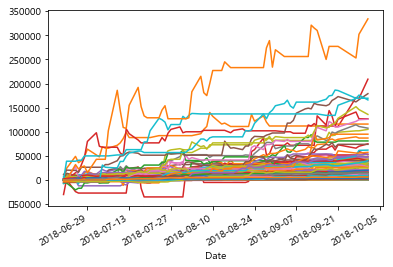

In [177]:
(res.Close.diff(1) * res.y_true2.shift(1)).cumsum().plot(legend=False)

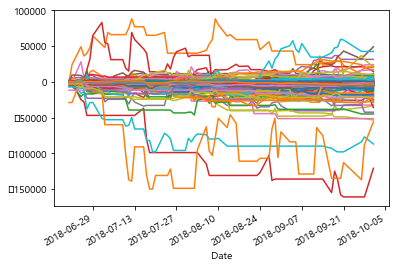

In [171]:
(res.Close.diff(1) * res.pred.shift(1)).cumsum().plot(legend=False)

In [130]:
res.Close.diff(1)

,AK홀딩스,BNK금융지주,CJ,CJ CGV,CJ대한통운,CJ제일제당,DB손해보험,DB하이텍,GKL,GS,...,현대위아,현대제철,현대중공업,현대차,현대해상,현대홈쇼핑,호텔신라,효성,후성,휴켐스
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-21,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,...,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0
2018-06-22,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,...,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0,-50.0
2018-06-25,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
2018-06-26,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,...,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0
2018-06-27,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0
2018-06-28,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,...,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0
2018-06-29,-500.0,-500.0,-500.0,-500.0,-500.0,-500.0,-500.0,-500.0,-500.0,-500.0,...,-500.0,-500.0,-500.0,-500.0,-500.0,-500.0,-500.0,-500.0,-500.0,-500.0
2018-07-02,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0


In [223]:
portfolio = pd.Series(index=res.pred.index)
portfolio.head()

Date
2018-06-20   NaN
2018-06-21   NaN
2018-06-22   NaN
2018-06-25   NaN
2018-06-26   NaN
dtype: float64

In [224]:
portfolio.iloc[0] = 1e8

In [231]:
res.y_true2.sum(1).iloc[0]

25.0

In [299]:
# 주식당 투자 자본
money_stock_invest = portfolio.iloc[0] / res.y_true2.sum(1).iloc[0]
# 1일차 주식 보유 (다음날 Open에 사서 당일 Close로 청산)
stock_share = (money_stock_invest / (res.y_true2.iloc[0] * res.Open.iloc[1])).replace(np.inf,0).astype(int)
# 1일차 Daily 이득
portfolio.iloc[1] = portfolio.iloc[0] + sum((res.Close.iloc[1] - res.Open.iloc[1]) * stock_share)
# 자금 업데이트
money_stock_invest = portfolio.iloc[1] / res.y_true2.sum(1).iloc[0]
# 2일차 주식 보유 (다음날 Open에 사서 당일 Close로 청산)
stock_share = (money_stock_invest / (res.y_true2.iloc[1] * res.Open.iloc[2])).replace(np.inf,0).astype(int)
# 1일차 Daily 이득
portfolio.iloc[2] = portfolio.iloc[1] + sum((res.Close.iloc[2] - res.Open.iloc[2]) * stock_share)

In [300]:
portfolio.iloc[1] / res.y_true2.sum(1).iloc[1]

2532819.5

In [302]:
portfolio.iloc[0] = 1e8
for i in range(len(portfolio)-1):
    money_stock_invest = portfolio.iloc[i] / res.y_true2.sum(1).iloc[i]
    stock_share = (money_stock_invest / (res.y_true2.iloc[i] * res.Open.iloc[i+1])).replace(np.inf,0).astype(int)
    portfolio.iloc[i+1] = portfolio.iloc[i] + sum((res.Close.iloc[i+1] - res.Open.iloc[i+1]) * stock_share)

In [315]:
portfolio

Date
2018-06-20    1.000000e+08
2018-06-21    1.013128e+08
2018-06-22    1.039997e+08
2018-06-25    1.051119e+08
2018-06-26    1.056906e+08
2018-06-27    1.060972e+08
2018-06-28    1.064758e+08
2018-06-29    1.066891e+08
2018-07-02    1.063503e+08
2018-07-03    1.056518e+08
2018-07-04    1.080701e+08
2018-07-05    1.084915e+08
2018-07-06    1.114850e+08
2018-07-09    1.120941e+08
2018-07-10    1.122689e+08
2018-07-11    1.125043e+08
2018-07-12    1.126334e+08
2018-07-13    1.137677e+08
2018-07-16    1.142032e+08
2018-07-17    1.148137e+08
2018-07-18    1.140679e+08
2018-07-19    1.142016e+08
2018-07-20    1.155157e+08
2018-07-23    1.163051e+08
2018-07-24    1.177872e+08
2018-07-25    1.183548e+08
2018-07-26    1.183315e+08
2018-07-27    1.183546e+08
2018-07-30    1.192134e+08
2018-07-31    1.197787e+08
                  ...     
2018-08-16    1.262485e+08
2018-08-17    1.276636e+08
2018-08-20    1.285245e+08
2018-08-21    1.290615e+08
2018-08-22    1.289387e+08
2018-08-23    1.295234e

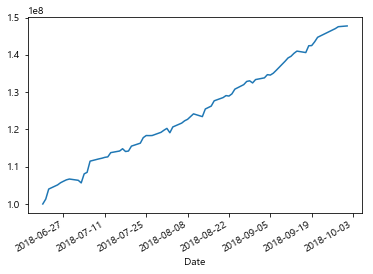

In [304]:
portfolio.plot()

In [311]:
sum(res.y_true2['삼성전자'] == 1) / len(res.y_true2['삼성전자'])

0.5285714285714286

In [294]:
(money_stock_invest / (res.y_true2.iloc[0] * res.Open.iloc[1])).replace(np.inf,0).astype(int)

AK홀딩스          0
BNK금융지주        0
CJ             0
CJ CGV         0
CJ대한통운        25
CJ제일제당         0
DB손해보험        63
DB하이텍          0
GKL            0
GS             0
GS건설           0
GS리테일          0
HDC          145
JW중외제약         0
JW홀딩스          0
KB금융           0
KCC            0
KT             0
KT&G           0
LF             0
LG             0
LG디스플레이        0
LG상사           0
LG생활건강         2
LG유플러스       291
LG이노텍          0
LG전자           0
LG하우시스         0
LG화학           0
LS             0
            ... 
한세실업           0
한솔케미칼         54
한온시스템          0
한올바이오파마        0
한일시멘트          0
한전KPS          0
한전기술           0
한진중공업          0
한화             0
한화생명           0
한화에어로스페이스      0
한화케미칼          0
현대건설           0
현대그린푸드         0
현대글로비스         0
현대리바트          0
현대모비스          0
현대미포조선         0
현대백화점          0
현대엘리베이        37
현대위아           0
현대제철           0
현대중공업          0
현대차            0
현대해상           0
현대홈쇼핑         36
호텔신라           0
효성            